###  Using the class spectral analysis

Tutorial on how to use the spectral analysis class to compute power spectrum, spectogram, and the pairwise coherence.

In [1]:
%matplotlib inline

import numpy               as     np
import matplotlib.pyplot   as     plt
from GDa.spectral_analysis import spectral, spectral_analysis
from GDa.session           import session

The class __spectral_analysis__ inherits from a more general class named __spectral__. Let's start by using the __spectral__ class:

In [2]:
spec = spectral()

To use the object __spec__ first we read a sample LFP signal:

In [3]:
data = np.load('raw_lfp/lucy_session01_150304.npy',allow_pickle=True).item()['data']
N    = data.shape[2]   # Number of time points 
fs   = 1000            # Sampling frequency  [Hz]

Next, we will select a random LFP signal in data:

In [4]:
lfp   = data[0,10,:]
lfp2  = data[0,30,:]
# Time axis, using from -0.65 to 3.00 s because this is the event dt we used when we saved the data
time = np.linspace(-0.65, 3.00, lfp.shape[-1]) 

Text(0, 0.5, 'mV')

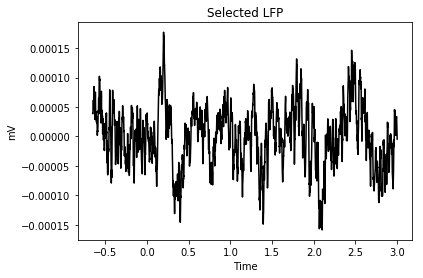

In [5]:
# Plotting the signal
plt.plot(time, lfp, 'k')
plt.title('Selected LFP')
plt.xlabel('Time')
plt.ylabel('mV')

We can bandpass filter the signal with the function __filter__ in __spectral__, let's filter it on the alpha band (8-12 Hz):

In [6]:
lfp_filterd = spec.filter(signal = lfp, fs = fs, f_low = 8, f_high = 12, n_jobs = -1)

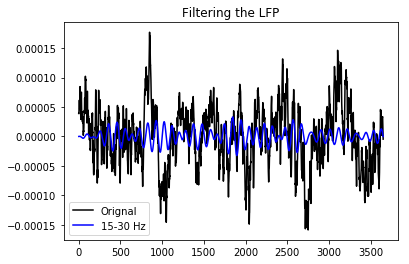

In [7]:
plt.plot(lfp, 'k')
plt.plot(lfp_filterd, 'b')
plt.title('Filtering the LFP')
plt.legend(['Orignal', '15-30 Hz'])

We can compute the spectogram of the signal using the function __wavelet_spectogram__, which allows to use morlet or multitaper transforms, or the function __garbor_spectogram__ (not built upon MNE). If we pass a second signal to those methods it will compute both the auto- and cross-spectra for the signal.

In [8]:
# Defining frequencies
freqs = np.arange(4,30,.1)

# Morlet
Sxx_ml, Syy_ml, Sxy_ml = spec.wavelet_spectrum(signal1 = lfp[np.newaxis, np.newaxis, :], 
                                               signal2 = lfp2[np.newaxis, np.newaxis, :], 
                                               fs = fs, freqs = freqs, n_cycles = 5.0,
                                               win_time=500, win_freq=1, 
                                               time_bandwidth = None, method = 'morlet', n_jobs = -1)

# Multitaper
Sxx_mt, Syy_mt, Sxy_mt = spec.wavelet_spectrum(signal1 = lfp[np.newaxis, np.newaxis, :], 
                                               signal2 = lfp2[np.newaxis, np.newaxis, :], 
                                               fs = fs, freqs = freqs, n_cycles = 5.0,
                                               win_time=500, win_freq=1,
                                               time_bandwidth = None, method = 'multitaper', n_jobs = -1)

# Garbor
Sxx_gb, Syy_gb, Sxy_gb = spec.gabor_spectrum(signal1 = lfp, 
                                             signal2 = lfp2, 
                                             fs = fs, freqs = freqs, n_cycles = 5.0,
                                              win_time = 500, win_freq = 1)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.9s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.8s finished


Next, we can visualize the result:

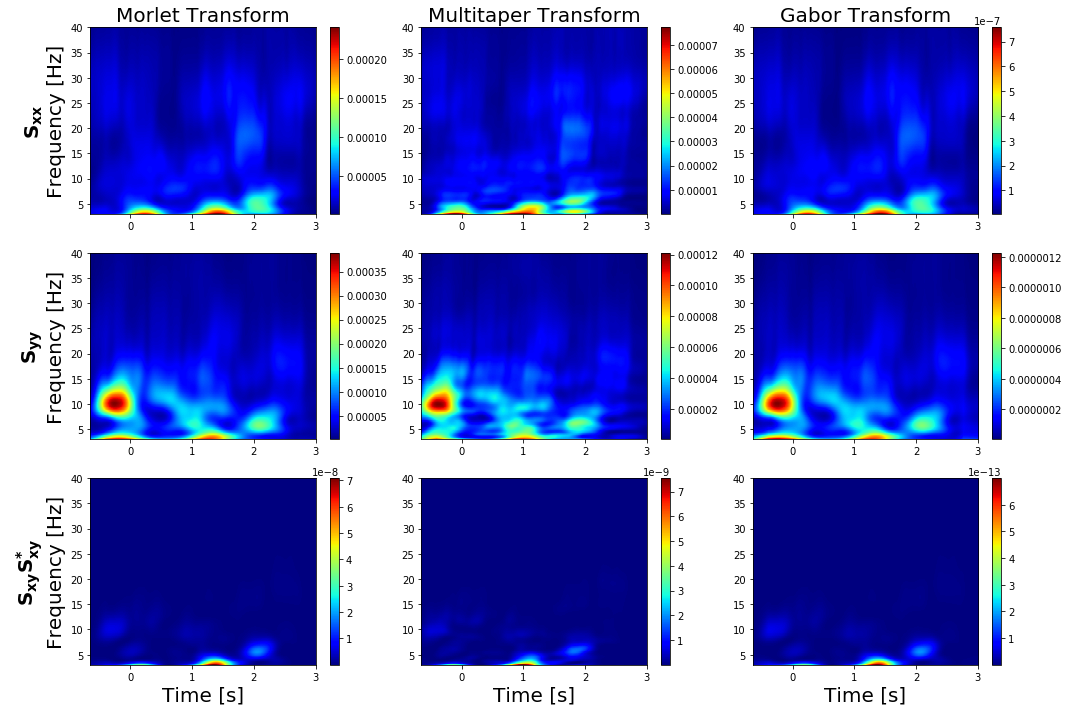

In [9]:
plt.figure(figsize=(15,10))
# Sxx
plt.subplot(3,3,1)
plt.imshow(Sxx_ml.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.title('Morlet Transform', fontsize=20)
plt.ylabel(r"$\bf{S_{xx}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.subplot(3,3,2)
plt.imshow(Sxx_mt.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.title('Multitaper Transform', fontsize=20)
plt.subplot(3,3,3)
plt.imshow(Sxx_gb.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.title('Gabor Transform', fontsize=20)

# Syy
plt.subplot(3,3,4)
plt.imshow(Syy_ml.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.ylabel(r"$\bf{S_{yy}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.subplot(3,3,5)
plt.imshow(Syy_mt.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.subplot(3,3,6)
plt.imshow(Syy_gb.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()

# Sxy
plt.subplot(3,3,7)
plt.imshow((Sxy_ml*np.conj(Sxy_ml)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.ylabel(r"$\bf{S_{xy}S_{xy}^{*}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.xlabel('Time [s]', fontsize=20)
plt.subplot(3,3,8)
plt.imshow((Sxy_mt*np.conj(Sxy_mt)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.xlabel('Time [s]', fontsize=20)
plt.subplot(3,3,9)
plt.imshow((Sxy_gb*np.conj(Sxy_gb)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.xlabel('Time [s]', fontsize=20)

plt.tight_layout()

Finally we can compute the time-frequency coherence between two signals by using the function __wavelet_coherence__, or __gabor_coherence__.

In [10]:
# Morlet
coh_ml  = spec.wavelet_coherence(signal1=lfp[np.newaxis, np.newaxis, :], 
                                 signal2=lfp2[np.newaxis, np.newaxis, :],
                                 fs=fs,freqs=freqs,n_cycles=5.0,
                                 win_time=500, win_freq=1, method='morlet',n_jobs=-1)

# Multitaper
coh_mt  = spec.wavelet_coherence(signal1=lfp[np.newaxis, np.newaxis, :], 
                                 signal2=lfp2[np.newaxis, np.newaxis, :],
                                 fs=fs,freqs=freqs,n_cycles=5.0, time_bandwidth=None,
                                 win_time=500, win_freq=1, method='multitaper',n_jobs=-1)

# Gabor
coh_gb = spec.gabor_coherence(signal1=lfp, 
                              signal2=lfp2, 
                              fs=fs, freqs=freqs,n_cycles = 5.0,
                              win_time=500, win_freq = 1)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.7s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    2.0s finished


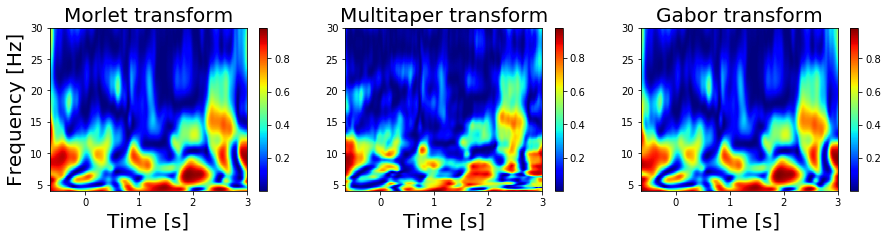

In [11]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.title('Morlet transform', fontsize=20)
plt.imshow(np.squeeze(coh_ml.real), aspect='auto', cmap='jet', origin='lower', extent=[-0.65, 3.00, 4, 30])
plt.ylabel('Frequency [Hz]', fontsize=20)
plt.xlabel('Time [s]', fontsize=20)
plt.colorbar()
plt.subplot(1,3,2)
plt.title('Multitaper transform', fontsize=20)
plt.imshow(np.squeeze(coh_mt.real), aspect='auto', cmap='jet', origin='lower', extent=[-0.65, 3.00, 4, 30])
plt.xlabel('Time [s]', fontsize=20)
plt.colorbar()
plt.subplot(1,3,3)
plt.title('Gabor transform', fontsize=20)
plt.imshow(np.squeeze(coh_gb.real), aspect='auto', cmap='jet', origin='lower', extent=[-0.65, 3.00, 4, 30])
plt.xlabel('Time [s]', fontsize=20)
plt.colorbar()

For all the functions above we can use only one signal as input or for a matrix with dimensions [N_trials, N_channels, time], unless for the Gabor ones because they do not use 

The __spectral_analysis__ class inherits the functions from __spectral__ however it is more focused on appling then efficiently to the LFP data. We can instatiate the __spectral_analysis__ class by either passing an session object to it, or by reading the data file saved by the session object (see notebook 1).

In [12]:
# 1. INSTATIATING SPECTRAL_ANALYSIS USING A SESSION OBJECT

ses = session(raw_path = 'GrayLab/', monkey = 'lucy', stype = 'samplecor', date = '150128', 
              session = 1, evt_dt = [-0.65,3.00])

ses.read_session_info()
ses.read_lfp_data()

spec = spectral_analysis(session = ses, path = None, freqs = freqs, delta=15)

In [13]:
# 2. INSTATIATING SPECTRAL_ANALYSIS USING THE DATA FILE FROM SESSION

spec = spectral_analysis(session = None, path = 'raw_lfp/lucy_session01_150304.npy', freqs = freqs, delta=15)

We can do all the operations we did with the __spectral__ object easily now. The operations are done by giving the trial, and channels number in which they should be performed. Let's starting by filtering a random signal in the alpha band.

In [14]:
lfp_filterd = spec._filter(trial = np.random.randint(0, data.shape[0]), 
                          index_channel = np.random.randint(0, data.shape[1]),
                          apply_to_all = False,
                          f_low = 8, f_high = 12, n_jobs = 1)

Filtering the signal

Text(0, 0.5, 'mV')

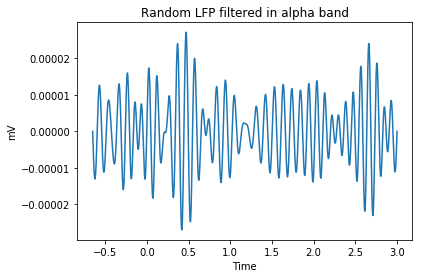

In [15]:
plt.plot(time, lfp_filterd )
plt.title('Random LFP filtered in alpha band')
plt.xlabel('Time')
plt.ylabel('mV')

Computing spectogram

In [16]:
idx = 30

# Morlet
Sxx_ml, Syy_ml, Sxy_ml = spec._wavelet_spectrum(trial = 0, 
                                                index_channel1 = 10, 
                                                index_channel2 = 30, 
                                                n_cycles = 5.0, 
                                                win_time=500, win_freq=1, time_bandwidth = None, 
                                                method = 'morlet', n_jobs = -1)
# Multitaper
Sxx_mt, Syy_mt, Sxy_mt = spec._wavelet_spectrum(trial = 0, 
                                                index_channel1 = 10, 
                                                index_channel2 = 30, 
                                                n_cycles = 5.0, 
                                                win_time=500, win_freq=1, time_bandwidth = None, 
                                                method = 'multitaper', n_jobs = -1)

#Gabor
Sxx_gb, Syy_gb, Sxy_gb = spec._gabor_spectrum(trial = 0, 
                                              index_channel1 = 10, 
                                              index_channel2 = 30, 
                                              n_cycles = 5.0,
                                              win_time = 500, win_freq = 1)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.8s finished


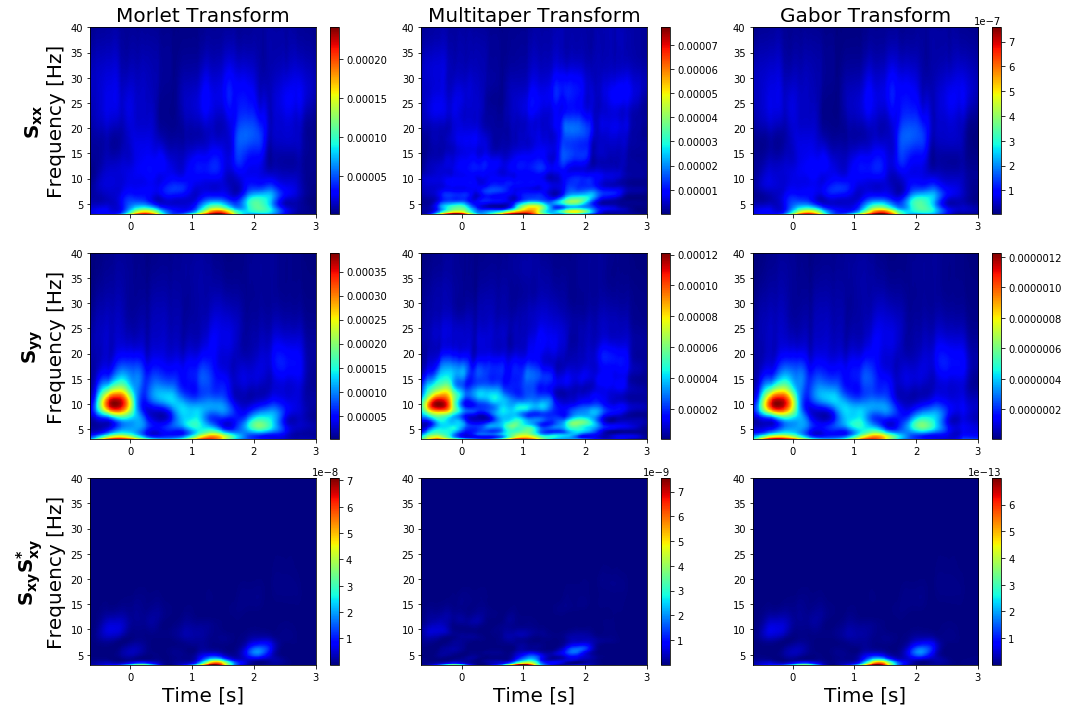

In [17]:
plt.figure(figsize=(15,10))
# Sxx
plt.subplot(3,3,1)
plt.imshow(Sxx_ml.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.title('Morlet Transform', fontsize=20)
plt.ylabel(r"$\bf{S_{xx}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.subplot(3,3,2)
plt.imshow(Sxx_mt.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.title('Multitaper Transform', fontsize=20)
plt.subplot(3,3,3)
plt.imshow(Sxx_gb.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.title('Gabor Transform', fontsize=20)

# Syy
plt.subplot(3,3,4)
plt.imshow(Syy_ml.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.ylabel(r"$\bf{S_{yy}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.subplot(3,3,5)
plt.imshow(Syy_mt.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.subplot(3,3,6)
plt.imshow(Syy_gb.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()

# Sxy
plt.subplot(3,3,7)
plt.imshow((Sxy_ml*np.conj(Sxy_ml)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.ylabel(r"$\bf{S_{xy}S_{xy}^{*}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.xlabel('Time [s]', fontsize=20)
plt.subplot(3,3,8)
plt.imshow((Sxy_mt*np.conj(Sxy_mt)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.xlabel('Time [s]', fontsize=20)
plt.subplot(3,3,9)
plt.imshow((Sxy_gb*np.conj(Sxy_gb)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,3,40]);plt.colorbar()
plt.xlabel('Time [s]', fontsize=20)

plt.tight_layout()

In [18]:
# Morlet
coh_ml  = spec._wavelet_coherence(trial = 0, 
                                  index_pair = 624,
                                  n_cycles=5.0,
                                  win_time=500, win_freq=1, method='morlet',n_jobs=-1)

# Multitaper
coh_mt  = spec._wavelet_coherence(trial = 0, 
                                  index_pair = 624,
                                  n_cycles=5.0, time_bandwidth=None,
                                  win_time=500, win_freq=1, method='multitaper',n_jobs=-1)

# Gabor
coh_gb = spec._gabor_coherence(trial = 0, 
                               index_pair = 624,
                               n_cycles = 5.0,
                               win_time=500, win_freq = 1)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    2.0s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.8s finished


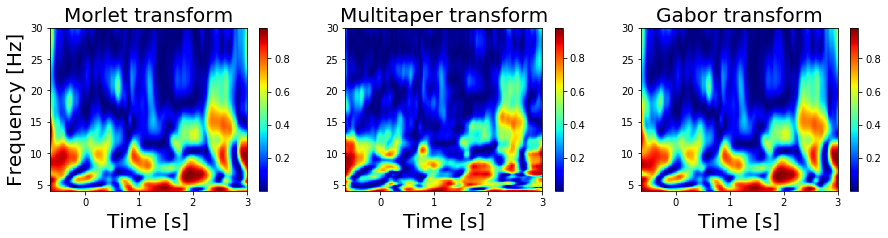

In [19]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.title('Morlet transform', fontsize=20)
plt.imshow(np.squeeze(coh_ml.real), aspect='auto', cmap='jet', origin='lower', extent=[-0.65, 3.00, 4, 30])
plt.ylabel('Frequency [Hz]', fontsize=20)
plt.xlabel('Time [s]', fontsize=20)
plt.colorbar()
plt.subplot(1,3,2)
plt.title('Multitaper transform', fontsize=20)
plt.imshow(np.squeeze(coh_mt.real), aspect='auto', cmap='jet', origin='lower', extent=[-0.65, 3.00, 4, 30])
plt.xlabel('Time [s]', fontsize=20)
plt.colorbar()
plt.subplot(1,3,3)
plt.title('Gabor transform', fontsize=20)
plt.imshow(np.squeeze(coh_gb.real), aspect='auto', cmap='jet', origin='lower', extent=[-0.65, 3.00, 4, 30])
plt.xlabel('Time [s]', fontsize=20)
plt.colorbar()